In [2]:
from mylib.statistic_test import *

code_id = '0023 - Place cell percentage'
loc = os.path.join(figpath, code_id)
mkdir(loc)
pass

d:\SoftwareData\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\0023 - Place cell percentage is already existed!


In [3]:
if os.path.exists(os.path.join(figdata, f'{code_id}.pkl')) == False:
    Data = {
        "MiceID": [],
        "Training Day": [],
        "Percentage": [],
        "Maze Type": [],
        "Stage": []
    }
    
    for mouse in [10209, 10212, 10224, 10227, 10232, 10234]:
        for i, stage in enumerate(['Stage 1', 'Stage 2']):
            print(f"{mouse} {stage}")
            for training_day in tqdm([f"Day {j}" for j in range(1, 14)]):
                idx = np.where(
                    (f1['MiceID'] == mouse) & 
                    (f1['training_day'] == training_day) & 
                    (f1['Stage'] == stage)
                )[0]
                if np.sum(f1['include'][idx]) < idx.shape[0]:
                    continue
                
                # Two Sessions of Open Field are not run
                if mouse == 10232 and stage == 'Stage 2' and training_day == 'Day 6':
                    # Mouse 10232, 20241004 Session 4 is missed.
                    with open(join(f1['Trace File'][idx[0]]), 'rb') as handle:
                        trace_op1 = pickle.load(handle)
                    percentage_op = np.mean(trace_op1['is_placecell'])
                    del trace_op1
                elif mouse == 10234 and stage == 'Stage 2' and training_day == 'Day 6': 
                    with open(join(f1['Trace File'][idx[-1]]), 'rb') as handle:
                        trace_op2 = pickle.load(handle)                     
                    percentage_op = np.mean(trace_op2['is_placecell'])
                    del trace_op2
                else:
                    with open(join(f1['Trace File'][idx[0]]), 'rb') as handle:
                        trace_op1 = pickle.load(handle)
                    with open(join(f1['Trace File'][idx[1]]), 'rb') as handle:
                        trace_op2 = pickle.load(handle)
                    percentage_op = (np.mean(trace_op1['is_placecell']) + np.mean(trace_op2['is_placecell']))/2
                    
                    del trace_op1, trace_op2
                    
                with open(join(f1['Trace File'][idx[1]]), 'rb') as handle:
                    trace_m1 = pickle.load(handle)
                    
                percentage_m1 = np.mean(trace_m1['is_placecell'])
                
                    
                if stage == 'Stage 1':
                    assert len(idx) == 3
                    Data['MiceID'].append(np.repeat(mouse, 2))
                    Data['Training Day'].append(np.repeat(training_day, 2))
                    Data['Percentage'].append([percentage_op, percentage_m1])
                    Data['Maze Type'].append(['Open Field', 'Maze A'])
                    Data['Stage'].append(np.repeat(stage, 2))                    
                    
                elif stage == 'Stage 2':
                    assert len(idx) == 4                
                    with open(join(f1['Trace File'][idx[2]]), 'rb') as handle:
                        trace_m2 = pickle.load(handle)  
                    percentage_m2 = np.mean(trace_m2['is_placecell'])  
                    
                    Data['MiceID'].append(np.repeat(mouse, 3))
                    Data['Training Day'].append(np.repeat(training_day, 3))
                    Data['Percentage'].append([percentage_op, percentage_m1, percentage_m2])
                    Data['Maze Type'].append(['Open Field', 'Maze A', 'Maze B'])
                    Data['Stage'].append(np.repeat(stage, 3))
                    
    for k in Data.keys():
        Data[k] = np.concatenate(Data[k])
    
    with open(join(figdata, f'{code_id}.pkl'), 'wb') as handle:
        pickle.dump(Data, handle)
    
    D = pd.DataFrame(Data)
    D.to_excel(os.path.join(figdata, code_id + '.xlsx'), index=False)
    print(len(D))
else:
    with open(os.path.join(figdata, code_id + '.pkl'), 'rb') as handle:
        Data = pickle.load(handle)

10209 Stage 1


100%|██████████| 13/13 [00:05<00:00,  2.45it/s]


10209 Stage 2


100%|██████████| 13/13 [00:06<00:00,  1.89it/s]


10212 Stage 1


100%|██████████| 13/13 [00:05<00:00,  2.32it/s]


10212 Stage 2


100%|██████████| 13/13 [00:10<00:00,  1.30it/s]


10224 Stage 1


100%|██████████| 13/13 [00:10<00:00,  1.28it/s]


10224 Stage 2


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


10227 Stage 1


100%|██████████| 13/13 [00:15<00:00,  1.16s/it]


10227 Stage 2


100%|██████████| 13/13 [00:17<00:00,  1.38s/it]


10232 Stage 1


100%|██████████| 13/13 [00:11<00:00,  1.17it/s]


10232 Stage 2


100%|██████████| 13/13 [00:14<00:00,  1.09s/it]


10234 Stage 1


100%|██████████| 13/13 [00:12<00:00,  1.02it/s]


10234 Stage 2


100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

386


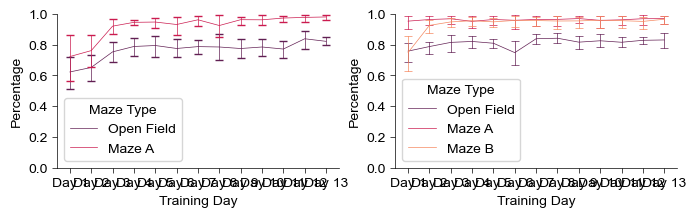

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 2))
ax0 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
ax1 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
SubData1 = SubDict(Data, Data.keys(), np.where(Data['Stage'] == 'Stage 1')[0])
sns.lineplot(
    x='Training Day',
    y='Percentage',
    hue='Maze Type',
    palette=MazePalette[:2],
    data=SubData1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'elinewidth': 0.5},
    ax=ax0
)
SubData2 = SubDict(Data, Data.keys(), np.where(Data['Stage'] == 'Stage 2')[0])
sns.lineplot(
    x='Training Day',
    y='Percentage',
    hue='Maze Type',
    data=SubData2,
    palette=MazePalette,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'elinewidth': 0.5, 'capthick': 0.5},
    ax=ax1
)
ax0.set_ylim(0, 1)
ax1.set_ylim(0, 1)
plt.savefig(join(loc, "Place Cell Proportion.png"), dpi=600)
plt.savefig(join(loc, "Place Cell Proportion.svg"), dpi=600)
plt.show()